In [14]:
# First clone the repo, and use the commands in the repo

import torch
import requests
from PIL import Image
import numpy as np
from torchvision.utils import make_grid, save_image
from diffusers import DiffusionPipeline  # only tested on diffusers[torch]==0.19.3, may have conflicts with newer versions of diffusers

def load_wonder3d_pipeline():

    pipeline = DiffusionPipeline.from_pretrained(
    'flamehaze1115/wonder3d-v1.0', # or use local checkpoint './ckpts'
    custom_pipeline='flamehaze1115/wonder3d-pipeline',
    torch_dtype=torch.float16
    )

    # enable xformers
    pipeline.unet.enable_xformers_memory_efficient_attention()

    if torch.cuda.is_available():
        pipeline.to('cuda:0')
    return pipeline

pipeline = load_wonder3d_pipeline()

# Download an example image.
cond = Image.open('2k2k_00003_front_rgba.png')
cond = np.array(cond)
cond_mask = cond[:, :, -1]
cond[cond_mask == 0] = [255, 255, 255, 0]
# The object should be located in the center and resized to 80% of image height.
cond_human = Image.fromarray(np.array(cond)[:, :, :3]).resize((256, 256))

# Run the pipeline!
images = pipeline(cond_human, num_inference_steps=50, output_type='pt', guidance_scale=3.0).images

result = make_grid(images, nrow=6, ncol=2, padding=0, value_range=(0, 1))

save_image(result, 'result_2k2k.png')

unet/diffusion_pytorch_model.safetensors not found
Loading pipeline components...: 100%|██████████| 5/5 [00:00<00:00,  6.06it/s]
You have disabled the safety checker for <class 'diffusers_modules.local.flamehaze1115--wonder3d-pipeline.3d356e9db3d3ad838b656210c66c9d8fd6f1936a.pipeline.MVDiffusionImagePipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .
100%|██████████| 50/50 [00:06<00:00,  7.66it/s]


In [12]:
import torch
import requests
from PIL import Image
import numpy as np
from torchvision.utils import make_grid, save_image
from diffusers import DiffusionPipeline  # only tested on diffusers[torch]==0.19.3, may have conflicts with newer versions of diffusers

def load_wonder3d_pipeline():

    pipeline = DiffusionPipeline.from_pretrained(
    'flamehaze1115/wonder3d-v1.0', # or use local checkpoint './ckpts'
    custom_pipeline='flamehaze1115/wonder3d-pipeline',
    torch_dtype=torch.float16
    )

    # enable xformers
    pipeline.unet.enable_xformers_memory_efficient_attention()

    if torch.cuda.is_available():
        pipeline.to('cuda:0')
    return pipeline

pipeline = load_wonder3d_pipeline()

# Download an example image.
cond = Image.open(requests.get("https://d.skis.ltd/nrp/sample-data/lysol.png", stream=True).raw)

# The object should be located in the center and resized to 80% of image height.
cond = Image.fromarray(np.array(cond)[:, :, :3])

# Run the pipeline!
images = pipeline(cond, num_inference_steps=50, output_type='pt', guidance_scale=3.0).images

result = make_grid(images, nrow=6, ncol=2, padding=0, value_range=(0, 1))

save_image(result, 'result.png')

unet/diffusion_pytorch_model.safetensors not found
Loading pipeline components...: 100%|██████████| 5/5 [00:00<00:00,  6.38it/s]
You have disabled the safety checker for <class 'diffusers_modules.local.flamehaze1115--wonder3d-pipeline.3d356e9db3d3ad838b656210c66c9d8fd6f1936a.pipeline.MVDiffusionImagePipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .
100%|██████████| 50/50 [00:06<00:00,  7.51it/s]


In [3]:
a = Image.open(requests.get("https://d.skis.ltd/nrp/sample-data/lysol.png", stream=True).raw)
b = Image.open('2k2k_00003_front_rgba.png').resize((256, 256))

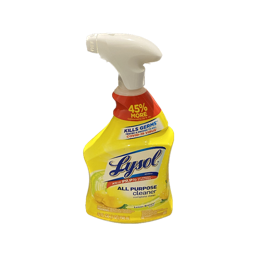

In [9]:
cond

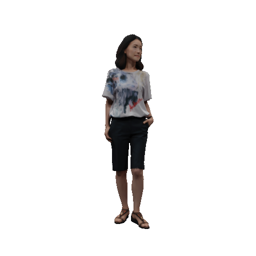

In [7]:
cond_human